In [1]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# EXPLORATORY DATA ANALYSIS

#### ABOUT THE DATA

- **Number of Instances**: 506
- **Number of Features**: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

- **Features Info**
    - CRIM - per capita crime rate by town
    - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    - INDUS - proportion of non-retail business acres per town.
    - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    - NOX - nitric oxides concentration (parts per 10 million)
    - RM - average number of rooms per dwelling
    - AGE - proportion of owner-occupied units built prior to 1940
    - DIS - weighted distances to five Boston employment centres
    - RAD - index of accessibility to radial highways
    - TAX - full-value property-tax rate
    - PTRATIO - pupil-teacher ratio by town
    - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT - % lower status of the population
    - MEDV - Median value of owner-occupied homes in $1000's (Target Variable)

#### Import the Data

In [2]:
# Read csv file as housing_df dataframe
housing_df = pd.read_csv("./HousingData.csv")

# check head of the dataframe
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
housing_df.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1
487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24,666,20.2,388.22,11.45,20.6
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6,391,19.2,396.90,12.01,21.8
494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6,391,19.2,396.90,13.59,24.5
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,23.1


##### Checking info, description, shape, null values

In [4]:
# shape of data ..

housing_df.shape

(506, 14)

In [5]:
# info ...
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
# Aggregate the dataset and give statistical info...
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In the above table, we can observe that two columns, namely, **"ZN"** & **"CHAS"** have both the 25%, 50% and 75% values as 0. This might suggest us that either they are categorical variables or that they don't contribute much to the prediction of our target variable, **"MEDV"**.

#### DATA PREPROCESSING

In [7]:
# Null values in the dataset
housing_df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

We can see that some of our data features have null values which we need to take care of subsequently
- CRIM
- ZN
- INDUS
- CHAS
- AGE
- LSTAT

In [8]:
# fill null values with the mean of their respective columns
for n in housing_df.columns:
    if housing_df[n].isnull().sum() > 0:
        housing_df[n].fillna(housing_df[n].mean(),inplace=True)

In [9]:
# Check the null values again
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Now, it is time to visualize the data to know the trends in each of the variables
- Starting with a box plot to know the amount of outliers
- The distribution plot also to help us know how our features are distributed 

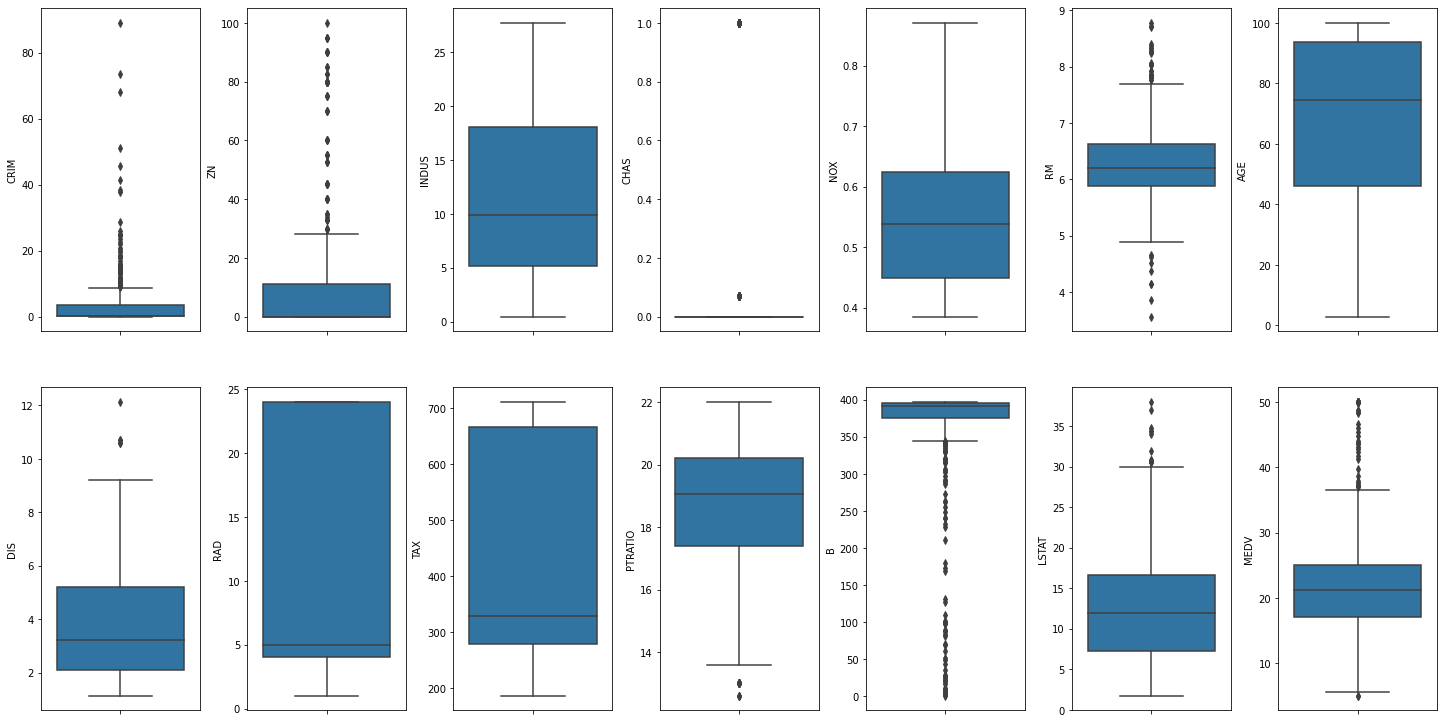

In [10]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in housing_df.columns:
    sns.boxplot(y=col, data=housing_df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

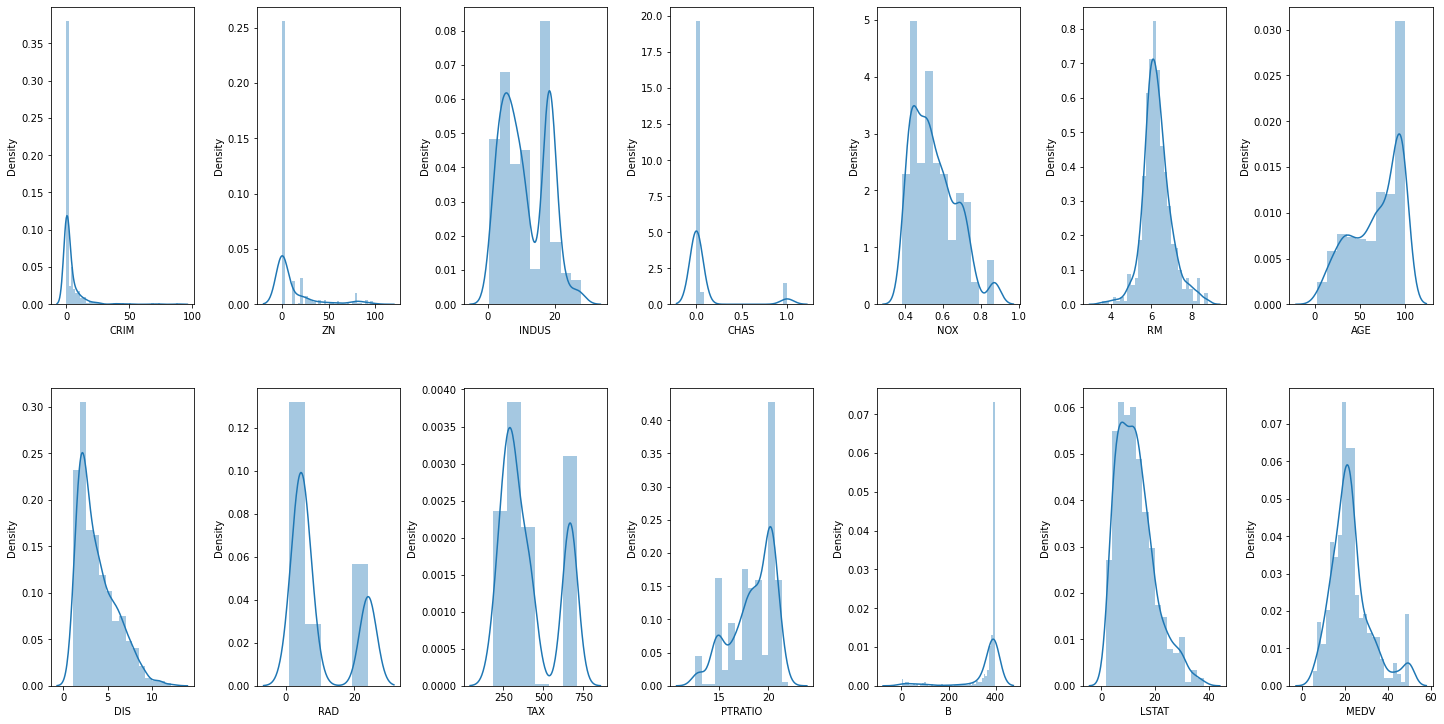

In [11]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in housing_df.columns:
    sns.distplot(housing_df[col].values, ax=ax[index])
    ax[index].set(xlabel=col)
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


From the boxplot and distplot, there is a need to perform some form of corrections in our data on some columns
- Some columns had high ranges and we need to normalize them
- Some are not evenly distributed and could create a noise in the model we want to build
- Notice that there is an outlier above 50 in the MEDV column (target variable) which makes it fall out of a normal distribution 
        - As such removing it is best

In [12]:
# Cleaning up the outlier in the MEDV column

housing_df = housing_df[~(housing_df['MEDV']>=50)]

In [13]:
housing_df.shape

(490, 14)

In [14]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

##### Min-Max Normalization

In [15]:
norm_cols = ["CRIM", "ZN", "TAX", "B"]
for norm_col in norm_cols:
    #find minimum and maximum of that column
    minimum = housing_df[norm_col].min()
    maximum = housing_df[norm_col].max()
    # perform min-max normalization
    housing_df[norm_col] = (housing_df[norm_col]-minimum) / (maximum-minimum)

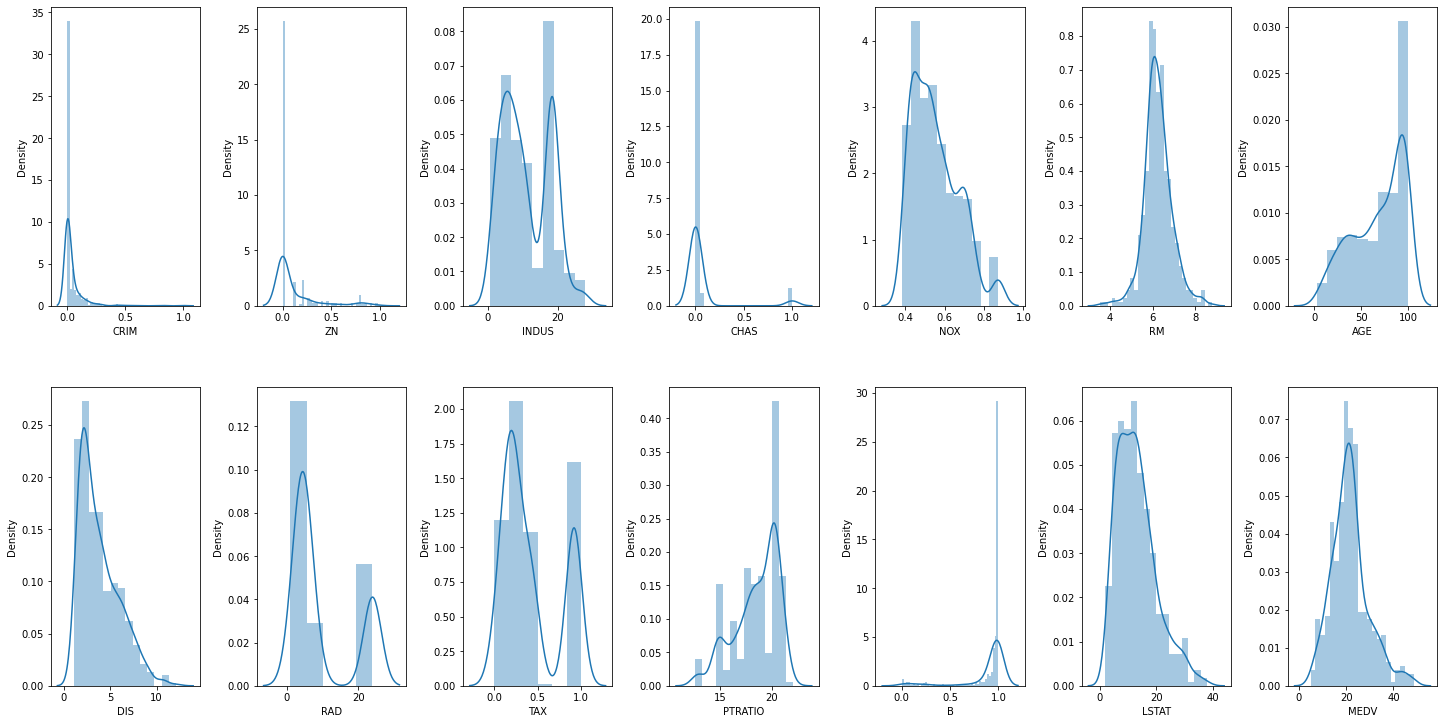

In [16]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in housing_df.columns:
    sns.distplot(housing_df[col].values, ax=ax[index])
    ax[index].set(xlabel=col)
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

##### Standardization

In [18]:
# standardization
scaler = StandardScaler()

# fit data
scaled_cols = scaler.fit_transform(housing_df[norm_cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=norm_cols)

# new_means = scaled_cols.mean()
# scaled_cols.fillna(new_means, inplace=True)
# scaled_cols.head()

In [19]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [20]:
housing_df.tail(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
486,0.063903,0.0,18.10,0.0,0.583,6.114,79.800000,3.5459,24,0.914122,20.2,0.989359,14.980000,19.1
487,0.054281,0.0,18.10,0.0,0.583,5.905,53.200000,3.1523,24,0.914122,20.2,0.978113,11.450000,20.6
488,0.001625,0.0,27.74,0.0,0.609,5.454,92.700000,1.8209,4,1.000000,20.1,0.995436,18.060000,15.2
489,0.001990,0.0,27.74,0.0,0.609,5.414,98.300000,1.7554,4,1.000000,20.1,0.866736,23.970000,7.0
490,0.002261,0.0,27.74,0.0,0.609,5.093,98.000000,1.8226,4,1.000000,20.1,0.802133,29.680000,8.1
491,0.001117,0.0,27.74,0.0,0.609,5.983,98.800000,1.8681,4,1.000000,20.1,0.982879,18.070000,13.6
492,0.001180,0.0,27.74,0.0,0.609,5.983,83.500000,2.1099,4,1.000000,20.1,1.000000,13.350000,20.1
493,0.001877,0.0,9.69,0.0,0.585,5.707,54.000000,2.3817,6,0.389313,19.2,1.000000,12.010000,21.8
494,0.003071,0.0,9.69,0.0,0.585,5.926,42.600000,2.3817,6,0.389313,19.2,1.000000,13.590000,24.5
495,0.001941,0.0,9.69,0.0,0.585,5.670,28.800000,2.7986,6,0.389313,19.2,0.990897,17.600000,23.1


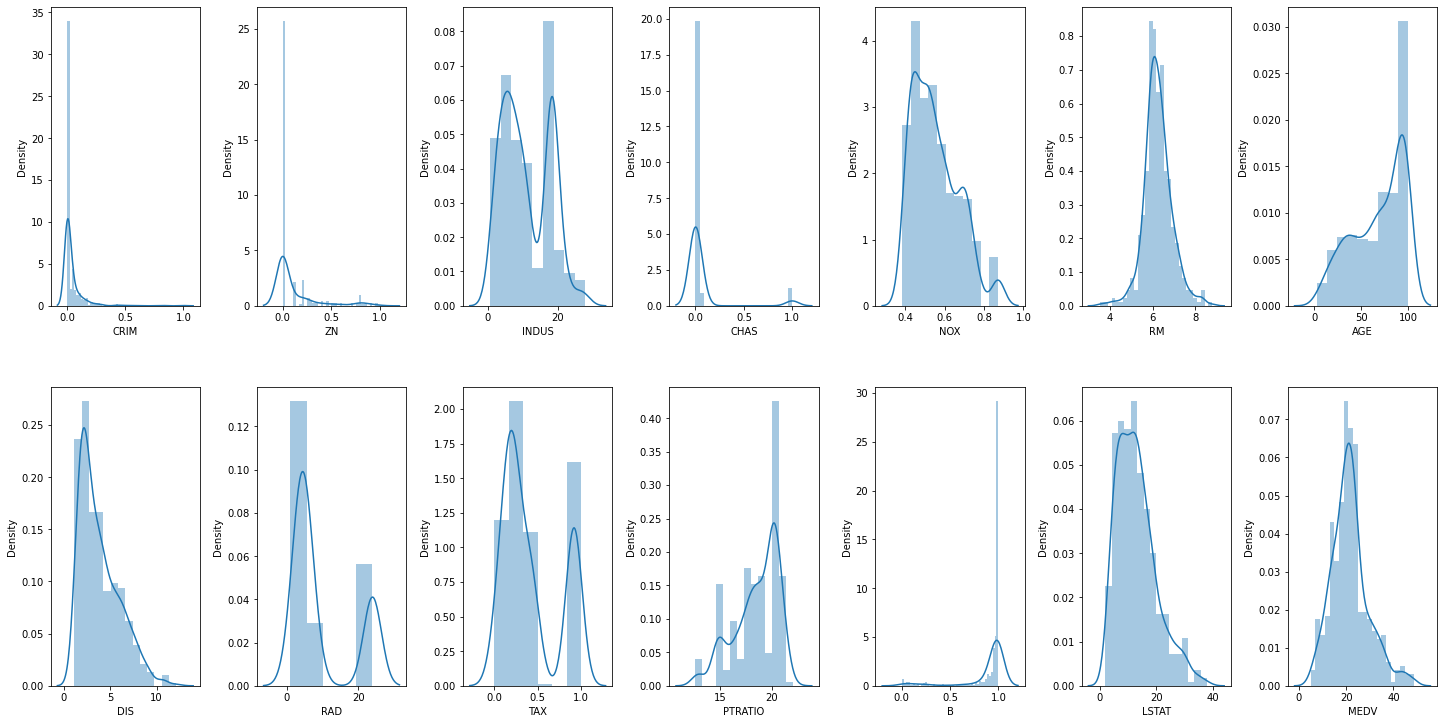

In [21]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col in housing_df.columns:
    sns.distplot(housing_df[col].values, ax=ax[index])
    ax[index].set(xlabel=col)
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

##### Correlation Matrix

<AxesSubplot:>

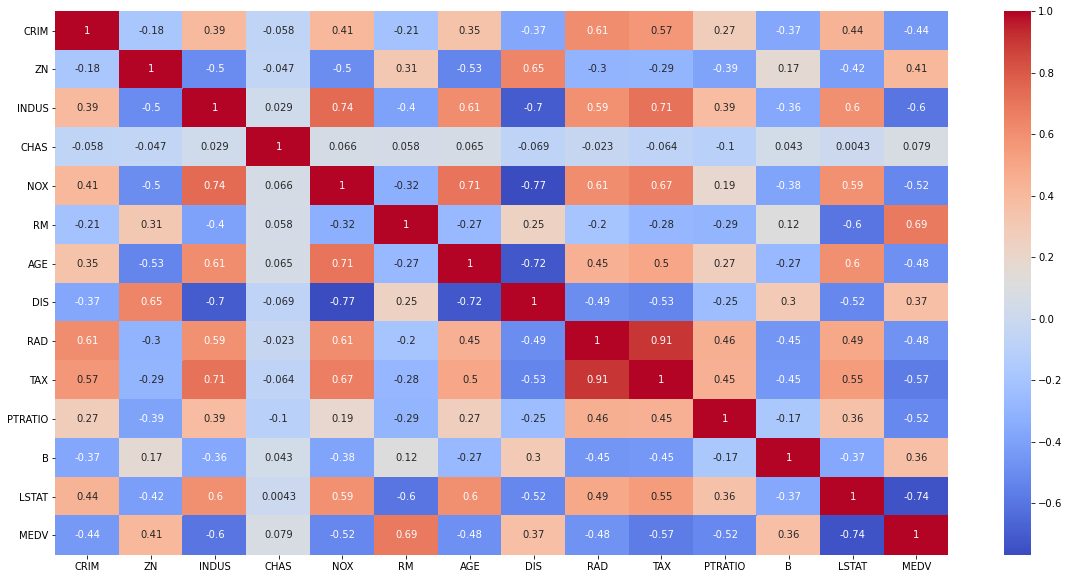

In [22]:
corr = housing_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

We are removing "RAD" variable because it is highly correlated with the "TAX" 

#### Train-Test Split

In [23]:
X = housing_df.drop(columns=['MEDV', 'RAD'], axis=1)
y = housing_df['MEDV']

In [24]:
housing_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Model Training

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Initialize a linear regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the testing data
y_train_pred = lr.predict(X_train)

# Make predictions on the testing data
y_test_pred = lr.predict(X_test)

In [46]:
y_train.shape, y_train_pred.shape

((392,), (392,))

In [47]:
# Error metrics to evaluate the corectness of the model in the Train Data

# Mean absolute error
m_ab_error_train = mean_absolute_error(y_train, y_train_pred)
# Mean squared error
mse = mean_squared_error(y_train, y_train_pred)
# R squared error
r2 = r2_score(y_train, y_train_pred)

# Print the results
print("Mean squared error: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))
print("Mean Absolute error value: ", m_ab_error_train)

Mean squared error: 15.11
R^2 score: 0.76
Mean Absolute error value:  2.853941787076705


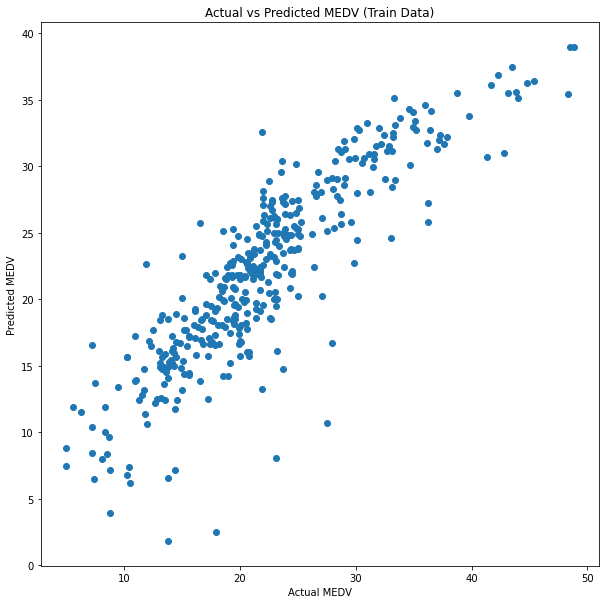

In [39]:
# Plotting the actual values against the predicted values of train data

plt.figure(figsize=(10,10))
plt.title("Actual vs Predicted MEDV (Train Data)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.scatter(y_train, y_train_pred)

In [40]:
# Error metrics to evaluate the corectness of the model in the Test Data

# Mean absolute error
m_ab_error_t = mean_absolute_error(y_test, y_test_pred)
# Mean squared error
mse = mean_squared_error(y_test, y_test_pred)
# R squared error
r2 = r2_score(y_test, y_test_pred)

# Print the results
print("Mean squared error: {:.2f}".format(mse))
print("R^2 score: {:.2f}".format(r2))
print("Mean Absolute error value: ", m_ab_error_t)

Mean squared error: 14.08
R^2 score: 0.72
Mean Absolute error value:  2.8857031435014147


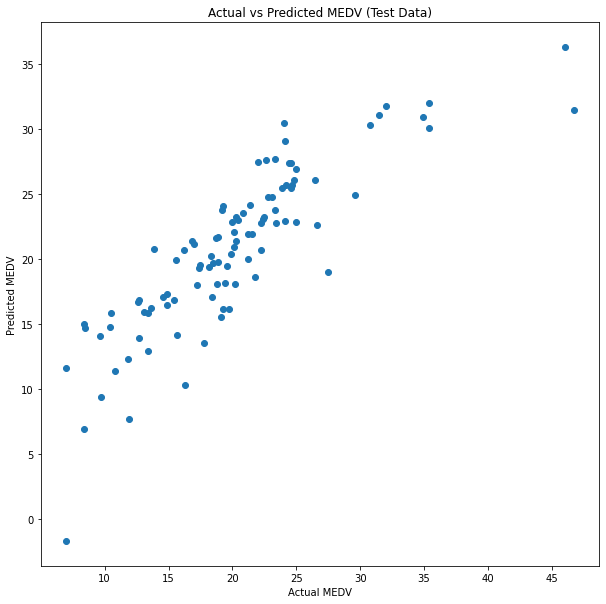

In [41]:
# Plotting the actual values against the predicted values

plt.figure(figsize=(10,10))
plt.title("Actual vs Predicted MEDV (Test Data)")
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.scatter(y_test, y_test_pred)

In [43]:
# creating a function to create adjusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

# Try the R-squared Adjusted score and see
print(adj_r2(X_train, y_train, lr))

0.7550125082901047
